In [2]:
!pip install -q kaggle

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [5]:
!kaggle datasets download -d vijaygiitk/multiclass-weather-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.9/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.9/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [6]:
!unzip '/content/multiclass-weather-dataset.zip'

unzip:  cannot find or open /content/multiclass-weather-dataset.zip, /content/multiclass-weather-dataset.zip.zip or /content/multiclass-weather-dataset.zip.ZIP.


In [7]:
Data = '/content/dataset'

In [8]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import splitfolders

In [10]:
splitfolders.ratio('/content/dataset', output="output", seed=1337, ratio=(.8, 0.2))

ValueError: ignored

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

NotADirectoryError: ignored

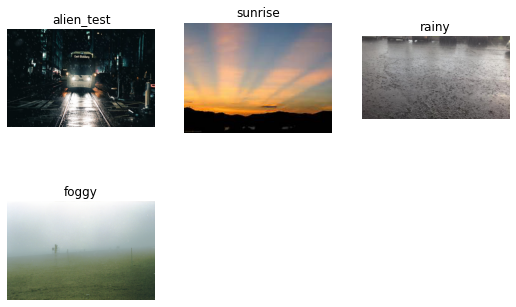

In [ ]:
import os
nrows = 3
ncols = 3

pos = 0

for subfolder in os.listdir(Data):
    
    image_file = os.listdir(os.path.join(Data, subfolder))[0]
    
    fig = plt.gcf()
    fig.set_size_inches(ncols * 3, nrows * 3)

    pos += 1
    sp = plt.subplot(nrows, ncols, pos)

    cur_image = mpimg.imread(os.path.join(Data, subfolder, image_file))
    plt.imshow(cur_image)
    plt.title(subfolder)
    plt.axis('Off')

In [ ]:
IMAGE_SIZE=[224,224]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/output/train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/output/val',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 1224 images belonging to 6 classes.
Found 306 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

In [ ]:
VGG19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet',include_top=False)

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in VGG19.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(VGG19.output)

In [ ]:
prediction = Dense(6, activation='softmax')(x)

In [ ]:
model = Model(inputs=VGG19.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
20/20 [==============================] - 43s 2s/step - loss: 1.9074 - accuracy: 0.4665 - val_loss: 0.9117 - val_accuracy: 0.7190
Epoch 2/50
20/20 [==============================] - 27s 1s/step - loss: 0.7407 - accuracy: 0.7598 - val_loss: 0.6116 - val_accuracy: 0.7810
Epoch 3/50
20/20 [==============================] - 26s 1s/step - loss: 0.5116 - accuracy: 0.8391 - val_loss: 0.5847 - val_accuracy: 0.8203
Epoch 4/50
20/20 [==============================] - 26s 1s/step - loss: 0.3882 - accuracy: 0.8856 - val_loss: 0.5231 - val_accuracy: 0.8301
Epoch 5/50
20/20 [==============================] - 27s 1s/step - loss: 0.3304 - accuracy: 0.9109 - val_loss: 0.4865 - val_accuracy: 0.8399
Epoch 6/50
20/20 [==============================] - 27s 1s/step - loss: 0.3082 - accuracy: 0.9175 - val_loss: 0.4797 - val_accuracy: 0.8529
Epoch 7/50
20/20 [==============================] - 27s 1s/step - loss: 0.2688 - accuracy: 0.9232 - val_loss: 0.4740 - val_accuracy: 0.8431
Epoch 8/50
20/20 [==

In [ ]:
model.save('wcv.h5')

In [ ]:
loss, accuracy = model.evaluate(test_set,
                                    steps=11, 
                                    verbose=2, 
                                    use_multiprocessing=True, 
                                    workers=2)
print(f'Model performance on test images:\nAccuracy = {accuracy}\nLoss = {loss}')

11/11 - 9s - loss: 0.5345 - accuracy: 0.8950 - 9s/epoch - 793ms/step
Model performance on test images:
Accuracy = 0.8949704170227051
Loss = 0.5344717502593994


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
model = load_model("/content/wcv.h5")

In [ ]:
img = image.load_img(r"/content/output/val/foggy/foggy107.jpg",target_size= (224,224))#loading of the image
x = image.img_to_array(img)#image to array
x = np.expand_dims(x,axis = 0)#changing the shape
preds=model.predict(x)
pred=np.argmax(preds,axis=1)
index=['alien_test','cloudy','foggy','rainy','shine','sunrise']
result=str(index[pred[0]])
result

1/1 [==============================] - 1s 853ms/step


'foggy'

In [ ]:
!tar -zcvf wcv.tgz wcv.h5

wcv.h5


In [ ]:
!pip install watson-machine-learning-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.9/538.9 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 KB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 92.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 967.4/967.4 KB 65.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 KB 20.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 20.3 MB/s eta 0:00:00
  Created wheel for ibm-cos-sdk: filename=ibm_cos_s

In [ ]:
!pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 KB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.6/824.6 KB 63.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 KB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.6/547.6 KB 7.3 MB/s eta 0:00:00
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72567 sha256=8ee91cef0386802d801b018d39eb7444bf908af2d5fa3e43e7d188c313d15727
  Stored in directory: /root/.cache/pip/wheels/56/14/78/c2fc4fe36e1e7198e4bde8707cf59b838a7be6859c631142f6
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501011 sh

In [ ]:
from ibm_watson_machine_learning import APIClient

wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"Bs2yNBW9CdxfT8HNLzy5wbaRKd2Mnue4Rxxjgcmgrazw"
}

client = APIClient(wml_credentials)
client

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [ ]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/d2155da9f8314ed5b9f1d91f55819a9b:3001af94-5c57-4347-9715-73a9741163ef::',
      'guid': '3001af94-5c57-4347-9715-73a9741163ef',
      'name': 'Watson Machine Learning-ps',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'adp',
    'scope': {'bss_account_id': 'd2155da9f8314ed5b9f1d91f55819a9b'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '7379bcaa-dde9-418b-b436-ac570ad2317c',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': 'd834c4f4b4fd407bb054f5ad2a004f09',
        'api_key': 'Uqc-9o7iPv8xfG9bfzlEKcWMZyymiomDIDOtf_eOvNuI',
        'secret_access_key': '61673674ab642bb36f9c9e88798c40ddcd80302b6e96529f',
        'service_id': 'ServiceId-6b3f55bf-c5e1-42f9-b571-ba67200cc0d3'},
       'editor': {'access_key_id': '1e5e92182fc043368d66b9d6e8e3bc86',
        'api_key': '0iZXD

In [ ]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  --------  ------------------------
ID                                    NAME      CREATED
c0faa178-fceb-4f09-bea4-d902d068a011  weather   2023-02-07T07:12:21.856Z
74118fd9-0cf9-4dcf-9437-263f8881a7f9  water     2023-01-23T09:59:12.303Z
c3dce651-7cdc-4a54-99dd-d9f484d2291b  eye       2023-01-18T06:37:07.049Z
a5a46f4f-45fb-4c55-b49d-f886ac4bea1e  Mushroom  2022-12-30T09:09:04.426Z
14f2af36-b926-4835-9837-fe62b001a2b4  adp       2022-11-11T17:15:23.479Z
------------------------------------  --------  ------------------------


In [ ]:
space_uid = "c0faa178-fceb-4f09-bea4-d902d068a011"
space_uid

'c0faa178-fceb-4f09-bea4-d902d068a011'

In [ ]:
client.set.default_space(space_uid)

'SUCCESS'

In [ ]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [ ]:
software_space_uid = client.software_specifications.get_uid_by_name('runtime-22.1-py3.9')
software_space_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [ ]:
import tensorflow
tensorflow.__version__

'2.9.2'

In [ ]:
model_details = client.repository.store_model(model="wcv.tgz", meta_props={
    client.repository.ModelMetaNames.NAME:"cnn",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [ ]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2023-02-07T07:15:48.093Z',
  'id': 'd02e536f-4547-4d41-9f7d-4c5de3888d33',
  'modified_at': '2023-02-07T07:15:53.637Z',
  'name': 'cnn',
  'owner': 'IBMid-6610044C0E',
  'resource_key': '7b28cb67-736a-4cfd-8d45-3f20047a10da',
  'space_id': 'c0faa178-fceb-4f09-bea4-d902d068a011'},
 'system': {'warnings': []}}

In [ ]:
model_id = client.repository.get_model_id(model_details)
model_id

'd02e536f-4547-4d41-9f7d-4c5de3888d33'

In [ ]:
client.repository.download(model_id,'cnn_wcv.tgz')

Successfully saved model content to file: 'cnn_wcv.tgz'


'/content/cnn_wcv.tgz'